In [27]:
import pandas as pd 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data=pd.read_csv('C:/Users/143531/TP1_MLPOS/batch/restaurant_1_week_002.csv')

In [11]:
dfrest1= pd.read_csv('C:/Users/143531/TP1_MLPOS/batch/restaurant_1_week_002.csv')
dfrest1

import os
import pandas as pd

# Répertoire contenant les fichiers CSV
directory = 'C:/Users/143531/TP1_MLPOS/batch/'

# Créez un DataFrame vide pour stocker les données du restaurant 1
df_restaurant_1 = pd.DataFrame()

# Boucle à travers les fichiers CSV et les concatène dans df_restaurant_1 si le fichier appartient au restaurant 1
for filename in os.listdir(directory):
    if filename.startswith("restaurant_1") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_temp = pd.read_csv(file_path)
        df_restaurant_1 = pd.concat([df_restaurant_1, df_temp], ignore_index=True)

In [12]:
df_restaurant_1

# Créez un DataFrame vide pour stocker les données du restaurant 1
df_restaurant_2 = pd.DataFrame()

# Boucle à travers les fichiers CSV et les concatène dans df_restaurant_1 si le fichier appartient au restaurant 1
for filename in os.listdir(directory):
    if filename.startswith("restaurant_2") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_temp = pd.read_csv(file_path)
        df_restaurant_2 = pd.concat([df_restaurant_2, df_temp], ignore_index=True)
#df_restaurant_2

In [37]:
df_restaurant_1

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,1388,2015-01-10 20:12:00,Onion Chutney,1,0.50,6
1,1388,2015-01-10 20:12:00,Mint Sauce,1,0.50,6
2,1388,2015-01-10 20:12:00,Lime Pickle,1,0.50,6
3,1388,2015-01-10 20:12:00,Paratha,1,2.95,6
4,1387,2015-01-10 16:55:00,Onion Bhaji,1,3.95,1
...,...,...,...,...,...,...
74813,15751,2019-12-07 19:46:00,Lamb Shashlick Curry,1,12.95,5
74814,15741,2019-12-07 17:19:00,Chicken Shashlick Curry,1,12.95,7
74815,14795,2019-12-05 18:56:00,Hazary Lamb Chilli Garlic,1,12.95,3
74816,14281,2019-12-04 19:07:00,King Prawn Shaslick,1,12.95,9


In [22]:
df_restaurant_1.rename(columns={'Order Number': 'Order ID'}, inplace=True)

In [25]:
# Les données
DATA = pd.concat([df_restaurant_1, df_restaurant_2])

In [29]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Hour'] = data['Order Date'].dt.hour

1. `X = data[['Hour', 'Quantity', 'Product Price']]`: Cette ligne crée une nouvelle DataFrame `X` à partir de votre DataFrame de données `data`. `X` contient les caractéristiques (ou variables indépendantes) que vous utiliserez pour effectuer des prédictions. Dans ce cas, les caractéristiques sont les colonnes 'Hour' (heure), 'Quantity' (quantité), et 'Product Price' (prix du produit). Vous extrayez ces colonnes pour les utiliser comme entrées pour votre modèle.

2. `y = data['Total products']`: Cette ligne crée une série `y` qui contient la variable cible que vous essayez de prédire, c'est-à-dire 'Total products' (total des produits). La variable cible est généralement ce que vous cherchez à prédire à partir de vos caractéristiques.

3. `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`: Cette ligne divise vos données en un ensemble d'entraînement (`X_train` et `y_train`) et un ensemble de test (`X_test` et `y_test`) en utilisant la fonction `train_test_split` de la bibliothèque scikit-learn.

   - `X` et `y` sont les données d'entrée (caractéristiques et variable cible) que vous avez préparées précédemment.
   - `test_size=0.2` indique que 20% des données seront utilisées comme ensemble de test, tandis que 80% seront utilisées comme ensemble d'entraînement.
   - `random_state=42` est utilisé pour fixer la graine aléatoire, ce qui signifie que les données seront divisées de la même manière à chaque exécution du code. Cela permet de rendre les résultats reproductibles.

Après l'exécution de cette ligne, vous avez maintenant quatre ensembles de données distincts pour l'entraînement et l'évaluation de votre modèle :
- `X_train` : Les caractéristiques d'entraînement.
- `y_train` : Les valeurs cibles correspondantes pour l'entraînement.
- `X_test` : Les caractéristiques de test.
- `y_test` : Les valeurs cibles correspondantes pour le test.

Cela permet de séparer les données en ensembles distincts pour l'entraînement et l'évaluation, ce qui est essentiel pour évaluer la performance de votre modèle de prédiction.

In [30]:
X = data[['Hour', 'Quantity', 'Product Price']]
y = data['Total products']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. `model = RandomForestRegressor(n_estimators=100, random_state=42)`: Cette ligne crée une instance de la classe RandomForestRegressor. RandomForestRegressor est un modèle d'ensemble basé sur des arbres de décision aléatoires, largement utilisé pour la régression. Les principaux paramètres que vous spécifiez ici sont :
   - `n_estimators=100`: Cela signifie que vous allez construire un ensemble de 100 arbres de décision aléatoires. Un grand nombre d'arbres peut améliorer la performance et la robustesse du modèle.
   - `random_state=42`: Cela fixe la graine aléatoire, ce qui garantit que les résultats sont reproductibles lorsque vous exécutez le code à nouveau.

2. `model.fit(X_train, y_train)`: Cette ligne entraîne le modèle RandomForestRegressor sur les données d'entraînement. Plus précisément :
   - `X_train` sont les caractéristiques d'entraînement que vous avez extraites précédemment.
   - `y_train` sont les valeurs cibles correspondantes (dans votre cas, le chiffre d'affaires réel) pour l'ensemble d'entraînement.
   
Lorsque cette ligne est exécutée, le modèle utilise les caractéristiques et les valeurs cibles d'entraînement pour apprendre à faire des prédictions sur le chiffre d'affaires en fonction des caractéristiques fournies. Le modèle construit un ensemble d'arbres de décision aléatoires, chacun apprenant des relations entre les caractéristiques et la variable cible.

Après cette étape, votre modèle RandomForestRegressor est prêt à être utilisé pour faire des prédictions sur de nouvelles données (dans votre cas, les données d'heures futures que vous avez mentionnées précédemment). Vous pouvez utiliser `model.predict()` pour effectuer des prédictions à l'aide de ce modèle entraîné.

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)

#calcule et arrondit l'erreur quadratique moyenne (MSE) entre les valeurs réelles y_test et 
#les prédictions y_pred du modèle. Voici ce que chaque élément de cette ligne fait :
mse = round(mean_squared_error(y_test, y_pred),4)

r2 = round(r2_score(y_test, y_pred) *100,4)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 0.2815
R-squared (R2) Score: 86.9684


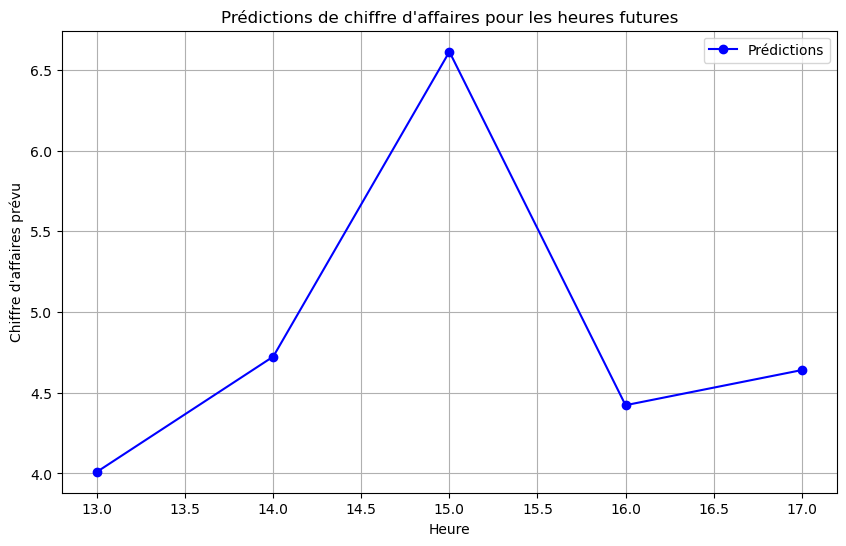

In [35]:
import matplotlib.pyplot as plt

# Créez une série de données d'heures futures que vous souhaitez prédire
future_hours = [13, 14, 15, 16, 17]  # Par exemple, les heures futures de 13h à 17h

# Créez un DataFrame pour les heures futures
future_data = pd.DataFrame({
    'Hour': future_hours,
    'Quantity': [10, 15, 20, 25, 30],  # Quantité de produits vendus pour chaque heure future
    'Product Price': [5.0, 5.5, 6.0, 6.5, 7.0]  # Prix unitaire des produits pour chaque heure future
})

# Utilisez le modèle pour prédire le chiffre d'affaires pour les heures futures
future_predictions = model.predict(future_data[['Hour', 'Quantity', 'Product Price']])

# Affichez les prédictions sous forme de graphique
plt.figure(figsize=(10, 6))
plt.plot(future_hours, future_predictions, marker='o', linestyle='-', color='b', label='Prédictions')
plt.xlabel('Heure')
plt.ylabel('Chiffre d\'affaires prévu')
plt.title('Prédictions de chiffre d\'affaires pour les heures futures')
plt.grid(True)
plt.legend()
plt.show()


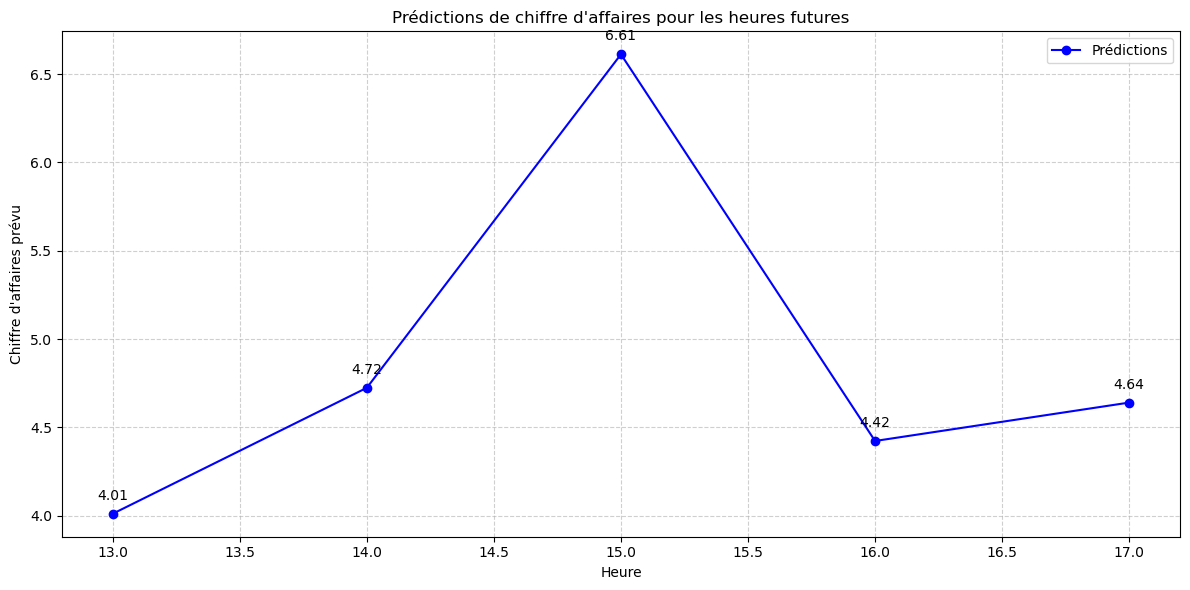

In [36]:
import matplotlib.pyplot as plt

# Créez une série de données d'heures futures que vous souhaitez prédire
future_hours = [13, 14, 15, 16, 17]  # Par exemple, les heures futures de 13h à 17h

# Créez un DataFrame pour les heures futures
future_data = pd.DataFrame({
    'Hour': future_hours,
    'Quantity': [10, 15, 20, 25, 30],  # Quantité de produits vendus pour chaque heure future
    'Product Price': [5.0, 5.5, 6.0, 6.5, 7.0]  # Prix unitaire des produits pour chaque heure future
})

# Utilisez le modèle pour prédire le chiffre d'affaires pour les heures futures
future_predictions = model.predict(future_data[['Hour', 'Quantity', 'Product Price']])

# Créez le graphique avec un style amélioré
plt.figure(figsize=(12, 6))
plt.plot(future_hours, future_predictions, marker='o', linestyle='-', color='b', label='Prédictions')
plt.xlabel('Heure')
plt.ylabel('Chiffre d\'affaires prévu')
plt.title('Prédictions de chiffre d\'affaires pour les heures futures')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Ajoutez des annotations pour les prédictions
for i, pred in enumerate(future_predictions):
    plt.annotate(f'{pred:.2f}', (future_hours[i], pred), textcoords="offset points", xytext=(0,10), ha='center')

# Affichez le graphique avec des annotations
plt.show()


In [42]:
data['CA'] = model.predict(data[['Hour', 'Quantity', 'Product Price']])

In [44]:
data

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Hour,CA
0,1388,2015-01-10 20:12:00,Onion Chutney,1,0.50,6,20,5.760000
1,1388,2015-01-10 20:12:00,Mint Sauce,1,0.50,6,20,5.760000
2,1388,2015-01-10 20:12:00,Lime Pickle,1,0.50,6,20,5.760000
3,1388,2015-01-10 20:12:00,Paratha,1,2.95,6,20,5.380000
4,1387,2015-01-10 16:55:00,Onion Bhaji,1,3.95,1,16,1.820000
5,1386,2015-01-10 16:28:00,Onion Bhaji,1,3.95,1,16,1.820000
6,630,2015-01-09 14:42:00,Onion Bhaji,1,3.95,3,14,3.010000
7,1385,2015-01-10 15:19:00,Tandoori Chicken (1/4),1,4.95,7,15,5.936667
8,1385,2015-01-10 15:19:00,Vegetable Samosa,1,4.95,7,15,5.936667
9,1382,2015-01-10 10:49:00,Vegetable Samosa,1,4.95,2,10,2.315536
